# Настройка ноутбука

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as st

import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

**Курс:**
- [Stepik: Основы статистики - Идея статистического вывода. p-уровень значимости](https://stepik.org/lesson/8078?unit=1358)

**Видео:**
- [StatQuest: Hypothesis Testing and The Null Hypothesis, Clearly Explained!!!](https://www.youtube.com/watch?v=0oc49DyA3hU)
- [StatQuest: Alternative Hypotheses: Main Ideas!!!](https://www.youtube.com/watch?v=5koKb5B_YWo)


- [StatQuest: p-values: What they are and how to interpret them](https://www.youtube.com/watch?v=vemZtEM63GY&ab_channel=StatQuestwithJoshStarmer)
- [StatQuest: How to calculate p-values](https://www.youtube.com/watch?v=JQc3yx0-Q9E)
- [StatQuest: Using Bootstrapping to Calculate p-values!!!](https://www.youtube.com/watch?v=N4ZQQqyIf6k&t=4s)
- [StatQuest: p-hacking: What it is and how to avoid it!](https://www.youtube.com/watch?v=HDCOUXE3HMM)


- [StatQuest: False Discovery Rates, FDR, clearly explained](https://www.youtube.com/watch?v=K8LQSvtjcEo)
- [StatQuest: Statistical Power, Clearly Explained!!!](https://www.youtube.com/watch?v=Rsc5znwR5FA&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=13)
- [StatQuest: Power Analysis, Clearly Explained!!!](https://www.youtube.com/watch?v=VX_M3tIyiYk)

**Статьи:**
- [Shad-ml: Идея статистического вывода, p-уровень значимости](https://sultanlive.gitbook.io/shad-ml/osnovy-statistiki-chast-1/ideya-statisticheskogo-vyvoda-p-uroven-znachimosti)
- [Хабр: Основы статистики - просто о сложных формулах](https://habr.com/ru/company/stepic/blog/250527/)

# Основная идея

**Статистическая гипотеза** — это предположение о каких-либо характеристиках случайной величины, тоесть ее генеральной совокупности.

После формулировки статистической гипотезы у нас есть два способа ее проверки:
1. Построить доверительный интервал
2. Рассчитать p-value (p-уровень значимости)

## Доверительный интервал

#### Задачи:

[Stepik: Основы статистики ч.1 - вопрос 4](https://stepik.org/lesson/8078/step/13?unit=1358)

Данные некоторого исследования сообщают нам, что средний рост детей в 10 лет составляет 136 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 99% доверительный интервал, который составил [130, 142]. Укажите верные утверждения

- [ ] Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.
- [X] У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 143
- [ ] Вероятность того, что истинное среднее значение больше 142, составляет 0,01
- [X] У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 128.

[Stepik: Основы статистки ч.1 - вопрос 5](https://stepik.org/lesson/8078/step/15?unit=1358)

H0: Среднее значение баллов в 2015 году равняется 115

In [3]:
def confidence_interval(n, mean_val, std_val, target_interval):
    alpha = 1 - target_interval
    z = abs(st.norm.ppf(alpha/2)) # 1.96
    se = std_val / np.sqrt(n)
    return (round(mean_val - z * se,  2),  round(mean_val + z * se,  2))

M = 115
m = 118
n = 144
std_val = 9
target_interval = 0.95

confidence_interval(n, m, std_val, target_interval)

(116.53, 119.47)

Среднее генеральной совокупности M = 115 не входит в доверительный интервал (116.53, 119.47) -> мы отвергаем нулевую гипотезу, значение 115 не попадает в 95%-ный доверительный интервал.

## p-value

В случае с вероятностным подходом ученый, получивший в своих наблюдениях численные данные, задается вопросом о вероятности получить точно такие же данные в случае, когда результат на самом деле случаен (то есть искомой закономерности в данных нет).

**Значение p-уровня значимости (p-value)**

— это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет.

— вероятность получить обозреваемые экстремальные данные при верной нулевой гипотезе, тоесть случайно.

**α** — значение p-уровня значимости, которое выбирается, в качестве порога. Чем меньше α, тем меньше шансов отклонить достоверную нулевую гипотезу

### Верные утверждения о p-value

1. p-уровень значимости не позволяет нам ничего сказать о том, с какой вероятностью верна нулевая гипотеза

    Если мы олучили p-value = 0.01, это **не значит**, что нулевая гипотеза верна с вероятностью 0.01.

    Если подбросить монету 10 раз и все разы выпал орел. Вероятность такого события (1/2)^10 = 1/1000. Но это не вероятность того, что монетка честная и работает правильно. Одна тысячная - это не вероятность того, что монетка у нас честная и работает правильно. Это вероятность получить 10 раз подряд одинаковый результат, если допустить, что наша монетка работает правильно.

2. p-уровень значимости ничего нам не сообщает о силе эффекта, о величине различий.

3. Если p-уровень значимости больше 0.05 мы делаем вывод, что у нас не достаточно оснаваний отклонить нулевую гипотезу. Это не значит, что нулевая гипотеза верна.

4. Сам по себе p-уровень значимости ничего не говорит о правильности, ценности или научности результатов.


### Вопросы по p-value

Как интерпретировать результат p-value близко к единице? Вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий близка к 100%. Такое вообще возможно?

### Как рассчитать p-value?

<img src="../data/img/p-value_comment.png" width="800">

```text
In summary, a p-value is composed of three parts:
1) The probability random chance would result in the observation.
2) The probability of observing something else that is equally rare
3) The probability of observing something rarer or more extreme.
```

### Pipeline проверки гипотез

Достоверными в области биологии, психологии и ряда иных дисциплин считаются результаты, характеризуемые вероятностью p < 0,05: эта запись означает, что **вероятность случайного результата составляет не более пяти процентов.**

Таким образом, в формальном виде процедуру опровержения нулевой гипотезы можно представить так:

1. Провести эксперимент
2. Выдвинуть предположение, что нулевая гипотеза истинна, и обозначить символом *p* вероятность (согласно данной гипотезе) получения результатов со столь же крайними значениями, что были получены в результате наблюдений.
3. Рассчитать значение p-value
4. Если p-value < α (0.05 или 0.01), что ваши *результаты статистически значимы*, у вас есть основания опровергнуть нулевую гипотезу. Если p-value > α - то у вас нет оснований отвергать нулевую гипотезу.


Проверку значимости нулевой гипотезы можно представить как несколько размытую версию доказательства от противного:

1. Предположим, нулевая гипотеза H0 истинна;
2. Из гипотезы H0 вытекает, что некий результат *O* очень маловероятен (скажем, не превышает порог Фишера 0.05);
3. Однако результат *O* был установлен процессом наблюдений;
4. Следовательно, вероятность H0 крайне мала;

Другими словами, мы имеем здесь не доказательство от противного, а доказательство от маловероятного.

### p-hacking

### Примеры задач

#### [Stepik: Основы статистки ч.1 - вопрос 5](https://stepik.org/lesson/8078/step/15?unit=1358)

In [4]:
# from math import sqrt
# import scipy.stats as st

# M = 115
# m = 118
# n = 144
# std_val = 9

# se = std_val / sqrt(n)
# z_value = (m - M) / se
# p_score = st.norm.cdf(z_value)*2
# p_score

Как это правильно интерпретировать?

#### Задача с монетой

Мы проводим 4 эксперимента с монетой, подрбасывая ее 10 раз и получает такие результаты (1 - орел, 2 - решка):

In [5]:
result_1 = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
result_2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
result_3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
result_4 = [1, 1, 0, 0, 0, 1, 0, 0, 1, 0]

1. Рассчитайте теоретическую вероятность каждого исхода?
2. Рассчитайте вероятность получить определенный результат, при предположении что наша монета самая обычная (p-value)?

#### Задача с ростом

Допустим у нас есть данные о росте женщин, проживающие в Бразилии.

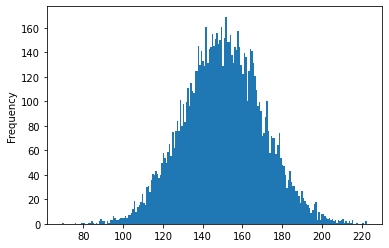

In [6]:
m = 150
sigma = 20

heights = pd.Series(np.random.normal(m, sigma, 10000))
heights.plot.hist(bins=200);

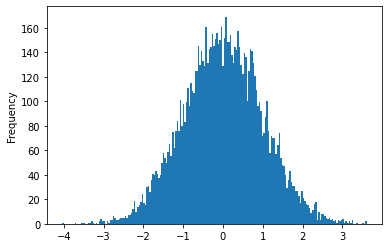

In [7]:
z_score = heights.to_frame().apply(st.zscore)[0]
z_score.plot.hist(bins=200);

Мы измерили еще 5 девушек.

In [8]:
person_1 = 150
person_2 = 200
person_3 = 40
person_4 = 188
person_5 = 0

1. Рассчитайте вероятность отношения выборки для каждой девушки?

#### Задача про лекарства

Допустим мы тестируем лекарства от болезни и хотим понять, какое из предложенных кандидатов действительно помогает пациентам лучше справлятся с болезнью.

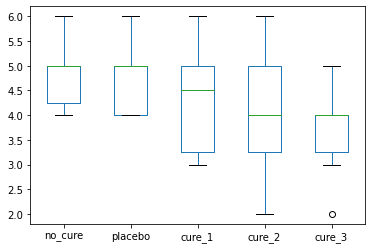

In [9]:
results = pd.DataFrame({
    'no_cure': [4, 4, 4, 5, 5, 5, 5, 5, 5, 6],
    'placebo': [4, 4, 4, 4, 5, 5, 5, 5, 5, 6],
    'cure_1': [3, 3, 3, 4, 4, 5, 5, 5, 5, 6],
    'cure_2': [2, 3, 3, 4, 4, 4, 5, 5, 6, 6],
    'cure_3': [2, 3, 3, 4, 4, 4, 4, 4, 5, 5],
})

results.boxplot(grid=False);

# Старые записи

## Умозрительный пример 1

X = [1,2,3,4] и Y = [2,4,6,8]

В общем случае гипотеза H0 гласит, что две переменные(X и Y) независимы, т. е. Изменение значений в X не повлияет на значения в Y.

Если вы вычислите "p-value", используя любой метод для этого случая, то оно должно оказаться очень малым значением, подразумевая, что существует очень низкая вероятность того, что этот случай будет следовать гипотезе H0, т. е. очень низкая вероятность того, что X и Y независимы друг от друга.

Это означает, что он никогда не будет следовать гипотезе H0 здесь, и эти две переменные зависят друг от друга в форме Y = 2X.

## Умозрительный пример 2

Предположим, мы решили выяснить, существует ли взаимосвязь между пристрастием к кофе и агрессивностью у школьников. Для этого были случайным образом сформированы две группы школьников по 100 человек в каждой (1 группа — дети выпивающие 0.3 литра кофе, вторая группа — совсем ну употребляющие кофе). В качестве показателя агрессивности выступает, например, число драк со сверстниками. И допустим, **нам видно**, что кофеманы дерутся чаще. Как проверить что обозреваеммый результат статистически значим?

В нашем случае...

H0: Между выборками пьющих и не пьющих кофе школьников нет статистически значимых различий.

H1: Между выборками есть статистически значимые различия.

**p-value** - это вероятность того, что гипотеза H0 подтверждается на имеющихся данных. Вероятность наблюдения рассматриваемых данных при верной гипотезе H0.
a

Мы сравнили две группы школьников между собой по уровню агрессивности при помощи стандартного t-теста (или непараметрического критерия Хи — квадрат более уместного в данной ситуации) и получили, что заветный p-уровень значимости меньше 0.05 (например 0.04). 

**p-value = 0.04 < alpha = 0.05 => отвергаем H0**

Но о чем в действительности говорит нам полученное значение p-уровня значимости?

1. **Кофеин — причина агрессивного поведения с вероятностью 96%.**

Это пример ошибки корреляции: факт значимой взаимосвязи двух переменных ничего не говорит нам о причинах и следствиях. Может быть, это более агрессивные дети имеют склонность к кофеину, а вовсе не кофеин делает детей агресивными.


2. **Вероятность того, что агрессивность и употребелние кофе не связаны, равна 0.04.**

Тоже нет. Все дело в том, что мы изначально принимаем за данное, что никаких различий на самом деле нет. И, держа это в уме как факт, рассчитываем значение p-value. Поэтому правильная интерпретация: **«Если предположить, что агрессивность и употребление кофе никак не связаны, то вероятность получить такие или еще более выраженные различия составила 0.04».**


3. **Если бы мы получили p-уровень значимости больше, чем 0.05, это означало бы, что агрессивность и употребление кофе никак не связаны между собой.**

Нет, это означает лишь то, что различия, может быть, и есть, но наши результаты не позволили их обнаружить.




Итак еще раз - вывод: **Если предположить, что агрессивность и употребление кофе никак не связаны, то вероятность получить такие или еще более выраженные различия составила 0.04. Значит, кофе и уровень агрессии связаны между собой.**

## Критерий Хи-квадрат

**Ресурсы:**
- [MachineLearning Wiki: Критерий хи-квадрат](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)


**Задачи:**

- **Определение распределения случайной величины** - проверка гипотезы, что рассматриваемая выборка извлечена из генеральной совокупности заданого закона распределения
- **Определение значимой корреляции между двумя категориальными переменными** - роверка гипотезы об отсутствии связи между двумя переменными.

**Вопросы:**
- **Чем отличаются критерии Хи-квадрат и Хи-квадрат-Пирсона?** Ничем

### Пример с кубиком (маленькая выборка)

#### Мы провели 4 серии экспериментов с подбрасыванием кубика и получили следующие результаты

In [47]:
dice = pd.DataFrame({
    '': ['one', 'two', 'three', 'four', 'five', 'six'],
    'a': [6, 8, 5, 4, 5, 7],
    'b': [4, 5, 4, 11, 8, 3],
    'c': [5, 3, 8, 7, 7, 5],
    'd': [10, 3, 4, 13, 6, 9]
})

dice = dice.set_index('')
dice.loc["total_rolls"] = dice.sum() # добавляем суммирующую строку
dice['total_dist'] = dice.sum(axis=1) # добавляем суммирующую колонку

dice

,a,b,c,d,total_dist
,,,,,
one,6,4,5,10,25
two,8,5,3,3,19
three,5,4,8,4,21
four,4,11,7,13,35
five,5,8,7,6,26
six,7,3,5,9,24
total_rolls,35,35,35,45,150


Как видно 4 выпадала гораздо чаще остальных, а 2 и 3 наоборот реже.Свзано ли это с тем, что кубик неправильный? Или же наша выборка недостаточно большая и такие результаты случайны?

#### Формулируем нулевую гипотезу H0

Кубик нормальный

#### Используем критерий Хи-квадрат

**Вначале нужно перевести результаты в формат np.array**

In [2]:
index = ['one', 'two', 'three', 'four', 'five', 'six']
columns = ['a', 'b', 'c', 'd']

dice = np.array(dice.loc[index, columns])
dice

NameError: name 'np' is not defined

**Или же просто**

In [11]:
a1 = [6, 4, 5, 10]
a2 = [8, 5, 3, 3]
a3 = [5, 4, 8, 4]
a4 = [4, 11, 7, 13]
a5 = [5, 8, 7, 6]
a6 = [7, 3, 5, 9]

dice = np.array([a1, a2, a3, a4, a5, a6])
dice

array([[ 6,  4,  5, 10],
       [ 8,  5,  3,  3],
       [ 5,  4,  8,  4],
       [ 4, 11,  7, 13],
       [ 5,  8,  7,  6],
       [ 7,  3,  5,  9]])

В случае, когда у нас нет предположений о распределении случайной величины, можно использовать метод stat.chi2_contigency. Он вернет частотную таблицу, которая поможет составить некоторое представление о распределении выборки

In [7]:
chi_square_statistic, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(dice)

print(
f'''

chi_square_statistic: {chi_square_statistic}

p_value: {p_value}

degrees_of_freedom: {degrees_of_freedom}


 === Contingency Table - expected_frequencies ===

{expected_frequencies}

'''
)



chi_square_statistic: 16.490612061288754

p_value: 0.35021521809742745

degrees_of_freedom: 15


 === Contingency Table - expected_frequencies ===

[[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]




#### Вывод:

**Вероятность получить такие результаты при верной нулевой гипотезе - 0.35, что больше чем пороги ошибки 0.05 и 0.01. Следовательно, мы подверждаем нуливую гипотезу. Кубик нормальный. По крайней мере, такой вывод можно сделать исходя из наших данных.**

### Пример с кубиком (большая выборка)

In [12]:
r1 = np.random.randint(1,7,1000)
r2 = np.random.randint(1,7,1000)
r3 = np.random.randint(1,7,1000)
r4 = np.random.randint(1,7,1000)
r5 = np.random.randint(1,7,1000)

unique, counts1 = np.unique(r1, return_counts=True)
unique, counts2 = np.unique(r2, return_counts=True)
unique, counts3 = np.unique(r3, return_counts=True)
unique, counts4 = np.unique(r4, return_counts=True)
unique, counts5 = np.unique(r5, return_counts=True)

dice = np.array([counts1, counts2, counts3, counts4, counts5])

chi_square_statistic, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(dice)

print(
f'''

chi_square_statistic: {chi_square_statistic}

p_value: {p_value}

degrees_of_freedom: {degrees_of_freedom}


 === Contingency Table - expected_frequencies ===

{expected_frequencies}

'''
)



chi_square_statistic: 25.344763592076397

p_value: 0.18855818572374633

degrees_of_freedom: 20


 === Contingency Table - expected_frequencies ===

[[164.8 169.8 178.  161.4 164.8 161.2]
 [164.8 169.8 178.  161.4 164.8 161.2]
 [164.8 169.8 178.  161.4 164.8 161.2]
 [164.8 169.8 178.  161.4 164.8 161.2]
 [164.8 169.8 178.  161.4 164.8 161.2]]




Чем больше наша выборка тем больше частоты в таблице соответствуют равномерному распределению

In [13]:
r1 = np.random.randint(1,7, 10000)
r2 = np.random.randint(1,7, 10000)
r3 = np.random.randint(1,7, 10000)
r4 = np.random.randint(1,7, 10000)
r5 = np.random.randint(1,7, 10000)

unique, counts1 = np.unique(r1, return_counts=True)
unique, counts2 = np.unique(r2, return_counts=True)
unique, counts3 = np.unique(r3, return_counts=True)
unique, counts4 = np.unique(r4, return_counts=True)
unique, counts5 = np.unique(r5, return_counts=True)

dice = np.array([counts1, counts2, counts3, counts4, counts5])

chi_square_statistic, p_value, degrees_of_freedom, expected_frequencies = stats.chi2_contingency(dice)

print(
f'''

chi_square_statistic: {chi_square_statistic}

p_value: {p_value}

degrees_of_freedom: {degrees_of_freedom}


 === Contingency Table - expected_frequencies ===

{expected_frequencies}

1/6 * 10 000 = {1/6*10000}
'''
)



chi_square_statistic: 12.424857791472391

p_value: 0.9006770692750461

degrees_of_freedom: 20


 === Contingency Table - expected_frequencies ===

[[1678.6 1673.6 1658.6 1654.8 1645.6 1688.8]
 [1678.6 1673.6 1658.6 1654.8 1645.6 1688.8]
 [1678.6 1673.6 1658.6 1654.8 1645.6 1688.8]
 [1678.6 1673.6 1658.6 1654.8 1645.6 1688.8]
 [1678.6 1673.6 1658.6 1654.8 1645.6 1688.8]]

1/6 * 10 000 = 1666.6666666666665



Теперь допустим, что у нас есть предположение о распределении случайной величины. Мы рассматриваем кубик - следовательно результаты должны быть распределены равномерно. Посчитав характеристики нашей выборки можно сгенерить теоретическое распределение. После чего сравнить эмпирическую и теоретическую выборки

### H0: результаты распределены равномерно - кубик нормальный
### H1: результаты распределены неравномерно - кубик бракованный

In [14]:
sum([59, 63, 37, 38, 32, 50])

279

In [15]:
sum([59, 63, 37, 38, 32, 50])/6

46.5

In [16]:
my_rolls_expected = [46.5, 46.5, 46.5, 46.5, 46.5, 46.5] # теоретическое ожидаемое распределение
my_rolls_actual =  [46.5, 46.5, 46.5, 46.5, 46.5, 46.5] # эмпирическое наблюдаемое распределение

stats.chisquare(my_rolls_actual, my_rolls_expected)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [17]:
my_rolls_expected = [46.5, 46.5, 46.5, 46.5, 46.5, 46.5] # теоретическое ожидаемое распределение
my_rolls_actual =  [59, 63, 37, 38, 32, 50] # эмпирическое наблюдаемое распределение

stats.chisquare(my_rolls_actual, my_rolls_expected)

Power_divergenceResult(statistic=17.49462365591398, pvalue=0.003651257113910144)

In [18]:
my_rolls_expected_normalized = [1/6]*6 # теоретическое ожидаемое распределение
my_rolls_actual_normalized =  [val/sum(my_rolls_actual) for val in my_rolls_actual] # эмпирическое наблюдаемое распределение

stats.chisquare(my_rolls_expected_normalized, my_rolls_actual_normalized)

Power_divergenceResult(statistic=0.06496613309977492, pvalue=0.9999440886251466)

In [19]:
?stats.chisquare

**p-value = 0.003. Вероятность получения эмпирической выборки меньше порога ошибки, равного 0.01. Мы отвергаем нулевую гипотезу**

## Игрушечный пример 1 - определить распределение случайной величины

In [20]:
data = [['CDU', 0.415, 57], 
        ['SPD', 0.257, 26], 
        ['Others', 0.328, 40]]

df = pd.DataFrame(data, columns = ['Varname', 'prob_dist', 'observed_freq']) 
df['expected_freq'] = df['observed_freq'].sum() * df['prob_dist']
df

,Varname,prob_dist,observed_freq,expected_freq
0,CDU,0.415,57,51.045
1,SPD,0.257,26,31.611
2,Others,0.328,40,40.344


In [21]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
for i in range(len(df)):
    O = df.loc[i, 'observed_freq']
    E = df.loc[i, 'expected_freq']
    chi_square += (O-E)**2/E

In [22]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, df['Varname'].nunique() - 1)
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1.693614940576721  and p value is: 0.6203442587006092
Failed to reject the null hypothesis.


In [23]:
# The critical value approach

print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, df['Varname'].nunique() - 1)
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1.693614940576721  and p value is: 5.991464547107979
Failed to reject the null hypothesis.


##### Здесь я пока не понимаю

## Игрушечный пример 2 - проверить наличие связи между двумя категориальными переменными

### Допустим мы хотим проследить связь пола человека с его пристрастием к курению

In [24]:
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


### Для проведения теста Хи-квадрат, нужно создать частотную перекресную таблицу 

In [25]:
contigency= pd.crosstab(df['Gender'], df['isSmoker']) 
contigency

isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


In [26]:
contigency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index') # normalize='column', normalize='all' 
contigency_pct

isSmoker,Non-Smpoker,Smoker
Gender,,
F,0.500000,0.500000
M,0.333333,0.666667


### Для удобства можно построить heatmap. Пользуясь функционалом styler или seaborn 

In [27]:
contigency.style.background_gradient(axis=1)

isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


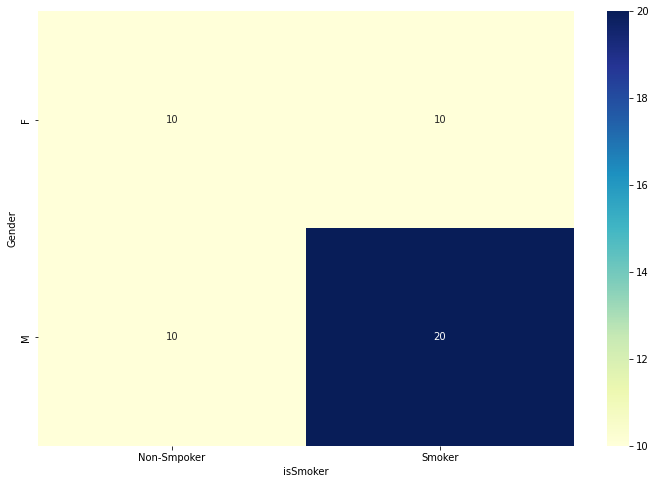

In [32]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu");

### Применяем критерий Хи-квадрат

- с - статистика теста
- p - p-value
- dof -степень свободы
- expected - ожидаемые частоты, основанные на предельных суммах таблицы

In [33]:
c, p, dof, expected = stats.chi2_contingency(contigency)

print(f'c: {c}\n \np: {p} \n \ndof: {dof} \n \nexpected: {expected}')

c: 0.78125
 
p: 0.3767591178115821 
 
dof: 1 
 
expected: [[ 8. 12.]
 [12. 18.]]


**p-value = 37.6%, это значит, что мы принимаем нулевую гипотезу о не связанности пола с пристрастием к курению с 95% уровнем уверенности**

#### Можно ли в данном случае применить z-test?

## Визуализация распределений

In [34]:
reactions = [328,454,312,625,609,546,502,736,485,766,429,313,328,344,360,
             453,563,343,375, 28,312,361,297,437,328,328,328,297,359,328,
             361,703,500,344,329,312,328,547,314,328,439,359,126,408,360,
             346,328,392,453,359]

samples=np.array(reactions)
mean=np.mean(reactions)
var=np.var(reactions)
std=np.sqrt(var) # квадратный корень из дисперсии

In [35]:
x = np.linspace(min(samples), max(samples), 12)
print("Excess kurtosis of normal distribution ( should be 0): {}".format(stats.kurtosis(x)))
print("Skewness of normal distribution ( should be 0): {}".format(stats.skew(x)))

Excess kurtosis of normal distribution ( should be 0): -1.2167832167832173
Skewness of normal distribution ( should be 0): 1.99915121504792e-16


In [41]:
y_pdf = stats.norm.pdf(x, mean, std)
y_skew_pdf = stats.skewnorm.pdf(x, *stats.skewnorm.fit(samples))

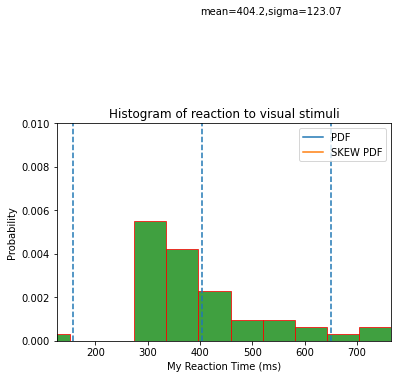

In [42]:
l1, = plt.plot(x, y_pdf, label='PDF')
l2, = plt.plot(x, y_skew_pdf, label='SKEW PDF')

# Compute histogram of Samples
n, bins, patches =plt.hist(samples,
                           bins = 12,
                           density=True,
                           
                           facecolor='g',
                           edgecolor='red', 
                           alpha=0.75)

plt.axvline(label='Mean=404.2 ms',x=404.2,linestyle='dashed')
plt.axvline(label='Mean-2sigma=158.06 ms',x=158.06,linestyle='dashed')
plt.axvline(label='Mean+2sigma=650.34 ms',x=650.34, linestyle='dashed')

plt.xlabel('My Reaction Time (ms)')
plt.ylabel('Probability')
plt.title('Histogram of reaction to visual stimuli')

# The first plt.text arguments are coordinates x,y of the plot
plt.text(400, 0.015,r'mean=404.2,sigma=123.07')
plt.legend((l1,l2),(l1.get_label(), l2.get_label()), loc='upper right')
plt.axis([126, 766, 0, 0.01])
plt.show()

### Как сделать тоже самое с plotly?
https://plotly.com/python/distplot/ - ссылка на документацию по построению гистограмм в plotly

In [49]:
np.random.seed(123)
x = np.random.normal(loc=2.5, scale=0.85, size=300) 
group_labels = 'My sample'

# Create distplot with custom bin_size, and without rug plot
fig = ff.create_distplot([x], [group_labels], bin_size=.2, show_rug=False)
fig.update_layout(width=600, 
                  height=400,
                  bargap=0.01)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [50]:
import plotly.express as px
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
fig = px.histogram(df, x="total_bill", y="tip", color="sex", marginal="rug",
                   hover_data=df.columns)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [52]:
df = pd.DataFrame({'2012': np.random.randn(200),
                   '2013': np.random.randn(200)+1})
fig = ff.create_distplot([df[c] for c in df.columns], df.columns, bin_size=.25)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed